
# Project: No-show appiontments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
.For more details, you can read through the description available on the homepage-links present [here](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000). There are 14 features which are self explanatory, they include; `PatientId` indicating identifiation of patient.`AppointmentId`, Identification of each appointment, `Gender`,whether the patient is a male or female, `ScheduledDay` which tells us on what day the patient set up their appointment.`AppointmentDay`,the day of the actuall appointment, when they have to visit the doctor.`Age`, the patient's age. `Neighborhood` indicates the location of the hospital where the appointment takes place.`Scholarship`indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000).`Hipertension`, `Diabetes`, `Alcoholism`, and `Handcap`,are features which tell us if a patient have a certain disease, where 1 means True and 0 means False.`SMS_recieved`,1 or more messages sent to the patient. Be careful about the encoding of the last column,`No-show` it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 


### Question(s) for Analysis
#### 1. Do patients enrolled in the scholarship showed more for appointments than those not enrolled?
#### 2. Are patients suffering from major diseases fulfil their appointment than others? 
#### 3. What is the distribution age of patients that fulfill their appointments? 
#### 4. Which gender type are showing up more for thier appointments?

In [2]:
## Importing required libraries

import pandas as pd #for Loading the dataset and data preprocessing

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Linear Algebra
import numpy as np

%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

Assessing the dataset for the number of _rows_ and _columns_, as well as the data types in each _column_. Loading the dataset and printing out a few lines. As well as performing operations to inspect the dataset. Finding data types and looking for instances of missing or possibly errant data.

In [4]:
# Loading the data and printing out a few lines. Performing operations to inspect data
#   Finding types and looking for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Investigating the number of rows and column in the dataset

df.shape

(110527, 14)

In [6]:
#Checking for if there exist a row with a NaN entry 
# And data types of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Inspecting for null values

df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [8]:
# Some descriptive statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#Investigating the number uniques enteries in each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
# Checking for duplicates in the dataset

df.duplicated().sum()

0


### Data Cleaning
Since there are no _Nan_ values, as well as duplicates in the dataset, there's no rows to fill or drop.
The columns we'll be dropping are; `PatientId`and `AppointmentId`.The two columns are serially generated numbers for identification, The `ScheduledDay` and `AppointmentDay` features are formatted to the appropriate datetime format using the datetime library, after extracting the appropriate string from the original string in the two columns.<br> We also replace the 0 and 1 values with the "False" and "True" respectively.
 

In [11]:
#Checking the exact type of data in the 'AppointmentDay' column

type(df['AppointmentDay'][0])

str

In [12]:
#Checking the exact type of data in the 'ScheduledDay' column

type(df['ScheduledDay'][0])

str

In [13]:
# Extracting the required string from the AppointmentDay
# And ScheduledDay Columns

df['AppointmentDay'] = df['AppointmentDay'].str[:10]
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#Import Datetime module
# This is to format the ScheduledDay and the AppointmentDay columns
# in a proper datetime format

from datetime import datetime


# Converting ScheduledDay and the AppointmentDay columns  datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='ignore',yearfirst=True,format="%d/%m/%Y",exact=True,unit=None,infer_datetime_format=True)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='ignore',yearfirst=True,format="%d/%m/%Y",exact=True,unit=None,infer_datetime_format=True)

In [15]:
#Checking the dataset dtype in ScheduledDay and the AppointmentDay columns
# To confirm the changes we made in the previous cell

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


We can see that both the `ScheduledDay` and `AppointmentDay` columns has been properly formatted to datetime format.

In [19]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [20]:
# Replacing the 0, 1, 2, 3 & 4s values in the dataset with
# True & False value to reflect the actual entry
# in the features. False for 0, True for 1, 2, 3, & 4


df['Handcap'] = df['Handcap'].replace([0,1,2,3,4],['False','True','True','True','True'])

In [21]:
# Replacing the 1s & 0s values in the dataset with
# True & False value to reflect the actual entry
# in the features

df['Scholarship'] = df['Scholarship'].replace([1, 0],['True','False'])
df['Hipertension'] = df['Hipertension'].replace([1, 0],['True','False'])
df['Diabetes'] = df['Diabetes'].replace([1, 0],['True','False'])
df['Alcoholism'] = df['Alcoholism'].replace([1, 0],['True','False'])
df['No-show'] = df['No-show'].replace(['No','Yes'],['True','False'])

df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,True
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,True
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,True


In [22]:
# Dropping the columns not needed for the analysis
# These columns are the PatientId and AppointmentID columns

df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,True
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,True
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,True
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,True


<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned the data, we're ready to move on to exploration. **Computing statistics** and **creating visualizations** with the goal of addressing the questions that we posed in the Introduction section.We compute the relevant statistics throughout the analysis when an inference is made about the data.



### Question 1 - Do patients enrolled in the scholarship showed more for appointments than those not enrolled?

In [23]:
# Creating two datasets from the cleaned dataset
# One for those who show up for their appointments, 'showed'
# And Another for those that didn't show up for theit appointments, 'not_showed'

showed =  df['No-show'] == 'True'
not_showed = df['No-show'] == 'False'

In [24]:
showed.head()

0    True
1    True
2    True
3    True
4    True
Name: No-show, dtype: bool

In [25]:
not_showed.head()

0    False
1    False
2    False
3    False
4    False
Name: No-show, dtype: bool

In [26]:
# Counting the total number patients that showed 
# for their appointment that might be enrolled in 
# the Bosla Scholarship or not.

df.Scholarship[showed].value_counts()

False    79925
True      8283
Name: Scholarship, dtype: int64

In [27]:
# Counting the total number patients that 'did not' show 
# for their appointment that might be enrolled in 
# the Bosla Scholarship or not.

df.Scholarship[not_showed].value_counts()

False    19741
True      2578
Name: Scholarship, dtype: int64

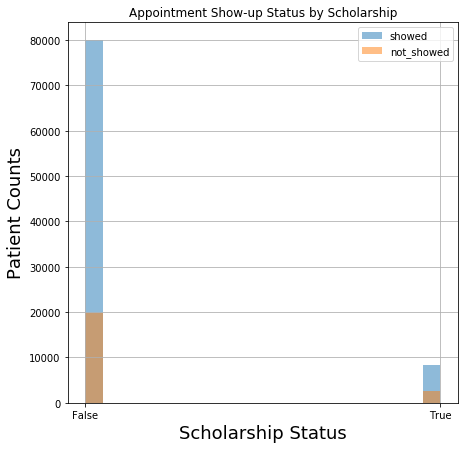

In [28]:
# Histogram plot showing the relationship between Scholarship and No-show variables.

fig, axs = plt.subplots(figsize=(7, 7))

df.Scholarship[showed].hist(alpha=0.5, bins=20, label='showed', ax=axs)
df.Scholarship[not_showed].hist(alpha=0.5, bins=20, label='not_showed', ax =axs)
axs.set_title('Appointment Show-up Status by Scholarship')
axs.set_xlabel("Scholarship Status", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)
plt.legend()
plt.show();


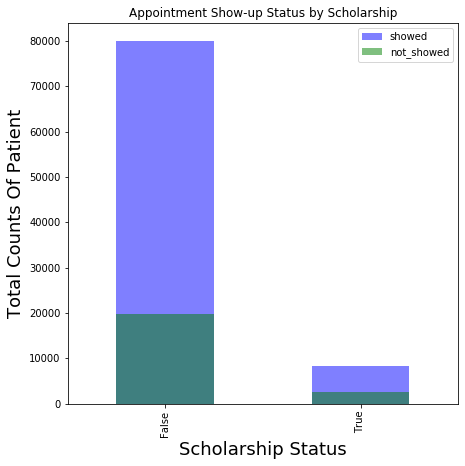

In [29]:
# Barchart plot showing the relationship between Scholarship and No-show variables.


fig, axs = plt.subplots(figsize=(7, 7))

df.Scholarship[showed].value_counts().plot(kind ='bar',alpha=0.5, color = 'blue',label='showed', ax =axs)
df.Scholarship[not_showed].value_counts().plot(kind ='bar', alpha=0.5, color = 'green', label='not_showed', ax=axs)
axs.set_title('Appointment Show-up Status by Scholarship')
axs.set_xlabel('Scholarship Status', fontsize = 18)
axs.set_ylabel('Total Counts Of Patient',fontsize = 18)
plt.legend();

From the above Histogram and Bar chart, the majority of people showing up for their appointments are not enrolled in the Bosla Scholarship Program

### Question 2 - Are patients suffering from major diseases fulfil their appointment than others? 

In [30]:
# Exploring the data to address additional more
#   questions. 

disease = ['Hipertension','Diabetes','Alcoholism','Handcap']
disease_df = df[disease]
disease_df.head()

,Hipertension,Diabetes,Alcoholism,Handcap
0,True,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,True,True,False,False


In [31]:
# Counting the total number patients that showed 
# for their appointment that might be Hypertensive or not.


df.Hipertension[showed].value_counts()

False    70179
True     18029
Name: Hipertension, dtype: int64

In [32]:
# Counting the total number patients that did not show 
# for their appointment that might be Hypertensive or not.

df.Hipertension[not_showed].value_counts()

False    18547
True      3772
Name: Hipertension, dtype: int64

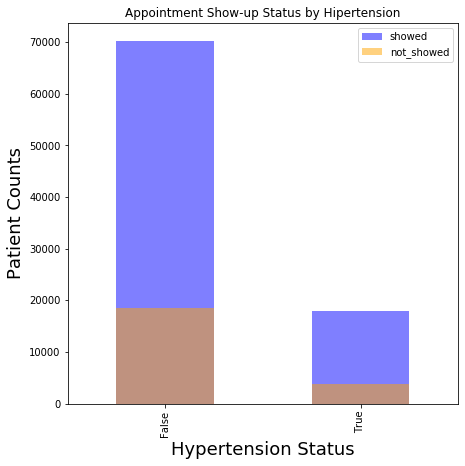

In [33]:
# Barchart plot showing the relationship between Hipertension and No-show variables.


fig, axs = plt.subplots(figsize=(7, 7))

df.Hipertension[showed].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='showed',ax =axs)
df.Hipertension[not_showed].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='not_showed', ax = axs)
axs.set_title('Appointment Show-up Status by Hipertension')
axs.set_xlabel("Hypertension Status", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)
plt.legend();

In [34]:
# Counting the total number patients that showed 
# for their appointment that might be Diabetic or not.


df.Diabetes[showed].value_counts()

False    81695
True      6513
Name: Diabetes, dtype: int64

In [35]:
# Counting the total number patients that did not show 
# for their appointment that might be Diabetic or not.

df.Diabetes[not_showed].value_counts()

False    20889
True      1430
Name: Diabetes, dtype: int64

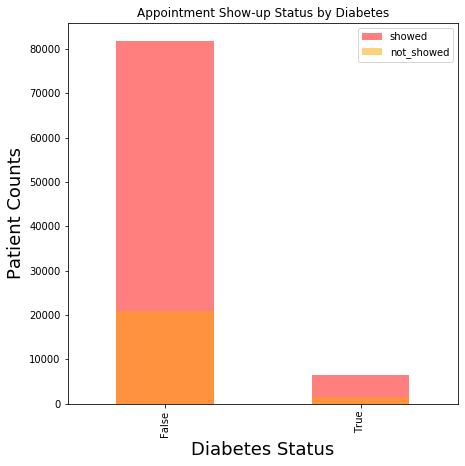

In [36]:
# Barchart plot showing the relationship between Diabetes and No-show variables.

fig, axs = plt.subplots(figsize=(7, 7))

df.Diabetes[showed].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='showed',ax =axs)
df.Diabetes[not_showed].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='not_showed', ax = axs)
axs.set_title('Appointment Show-up Status by Diabetes')
axs.set_xlabel("Diabetes Status", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)
plt.legend();

In [37]:
# Counting the total number patients that showed 
# for their appointment that might be Alcoholic or not.


df.Alcoholism[showed].value_counts()

False    85525
True      2683
Name: Alcoholism, dtype: int64

In [38]:
# Counting the total number patients that did not show 
# for their appointment that might be Alcoholic or not.

df.Alcoholism[not_showed].value_counts()

False    21642
True       677
Name: Alcoholism, dtype: int64

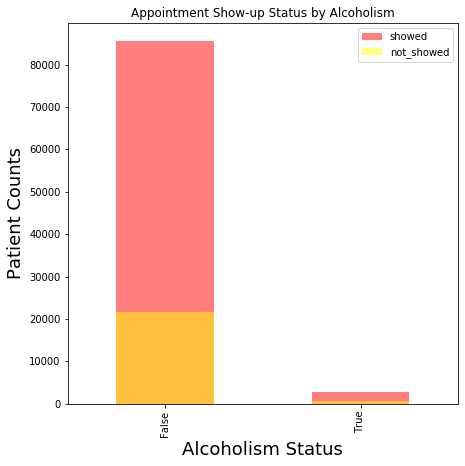

In [39]:
# Barchart plot showing the relationship between Alcoholism and No-show variables.

fig, axs = plt.subplots(figsize=(7, 7))

df.Alcoholism[showed].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='showed',ax =axs)
df.Alcoholism[not_showed].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='not_showed', ax = axs)
axs.set_title('Appointment Show-up Status by Alcoholism')
axs.set_xlabel("Alcoholism Status", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)
plt.legend();

In [40]:
# Counting the total number patients that showed 
# for their appointment that might be Handicapped or not.

df.Handcap[showed].value_counts()

False    86374
True      1834
Name: Handcap, dtype: int64

In [41]:
# Counting the total number patients that did not show 
# for their appointment that might be Handicapped or not.

df.Handcap[not_showed].value_counts()

False    21912
True       407
Name: Handcap, dtype: int64

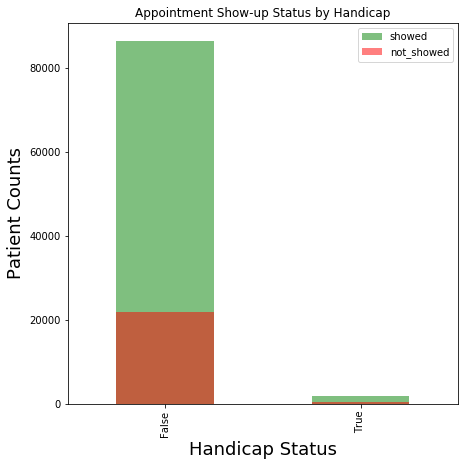

In [42]:
# Barchart plot showing the relationship between Handcap and No-show variables.


fig, axs = plt.subplots(figsize=(7, 7))

df.Handcap[showed].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='showed',ax =axs)
df.Handcap[not_showed].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='not_showed', ax = axs)
axs.set_title('Appointment Show-up Status by Handicap')
axs.set_xlabel("Handicap Status", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)
plt.legend();

### Question 3 - What is the distribution age of patients that fulfill their appointments? 

The histogram plot for the age distribution in the dataset indicates that similar age group both fulfill and not fulfill their appointments

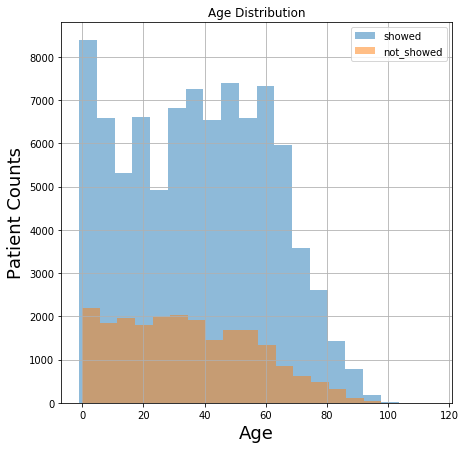

In [43]:
# Investigating the distribution of age for showed and not-showed
# Histogram plot showing the the distribution of age for appointment.

fig, axs = plt.subplots(figsize=(7, 7))
df.Age[showed].hist(alpha=0.5, bins=20, label='showed', ax =axs)
df.Age[not_showed].hist(alpha=0.5, bins=20, label='not_showed', ax=axs)
axs.set_title('Age Distribution')
axs.set_xlabel("Age", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)

plt.legend();

### Question 4 - Which gender type are showing up more for thier appointments?

In [44]:
# Checking the total number of each gender type in the data

df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [46]:
# Checking the total number of each gender type in the data
# that show up for their appointment

df.Gender[showed].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

In [47]:
# Checking the total number of each gender type in the data
# that didn't show up for their appointment

df.Gender[not_showed].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

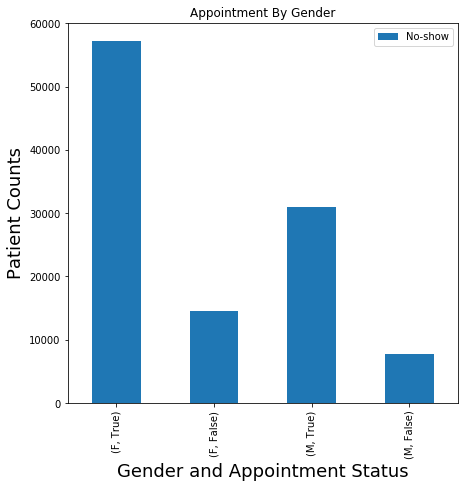

In [48]:
# Barchart plot showing the relationship between Hipertension and No-show variables.

fig, axs = plt.subplots(figsize=(7, 7))

df.groupby('Gender')['No-show'].value_counts().plot(kind = 'bar');
axs.set_title('Appointment By Gender')
axs.set_xlabel("Gender and Appointment Status", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)
plt.legend();

From the above bar chart, we can see that from the _total numbers of each gender type recorded in the dataset_ more males are showing up for their appointments compared to females. The numbers of females not showing up for their appoint doubles that of the males. We try to find out why? Looking at the cell below, you find out that, the majority of females and males that showed for their appointments are not enrolled on scholarship. The first bar and the fifth bar revealed this. Therefore being enrolled or not in the scholarship doesn't determine why a certain type of gender fulfils their appointment than the others.

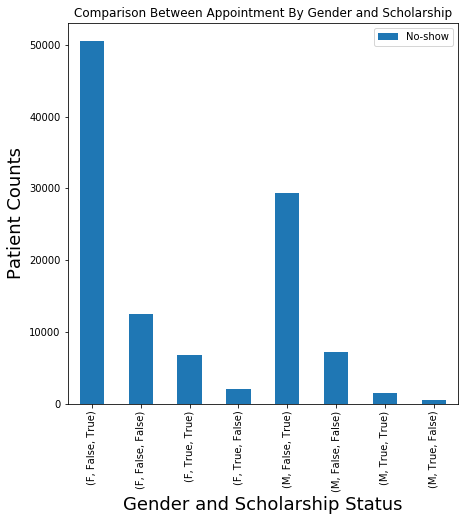

In [49]:
# Barchart plot showing the relationship between Gender, Scholarship, and No-show variables.

fig, axs = plt.subplots(figsize=(7, 7))

df.groupby(['Gender','Scholarship'])['No-show'].value_counts().plot(kind='bar')
axs.set_title('Comparison Between Appointment By Gender and Scholarship')
axs.set_xlabel("Gender and Scholarship Status", fontsize =18)
axs.set_ylabel("Patient Counts", fontsize =18)
plt.legend();


<a id='conclusions'></a>
## Conclusions

#### 1. No, majority of patients fulfilling their appointments aren't enrolled in the scholarship program.
#### 2. The higher percentage of patients showing up for their appointments are not suffering from major diseases. 
#### 3. The age distribution of patients both fulfilling and not fulfilling their appointments are similar.
#### 4. From the _total numbers of each gender type recorded in the dataset_ more males are showing up for their appointments compared to females. The numbers of females not showing up for their appoint doubles that of the males.

> **Limitation**: One of the limitations of my analysis, would be the limited exploration of both the `ScheduledDay`and `AppointmentDay` columns.Perhaps some patients appointments falls on a holiday. 



In [51]:
#zip -r workspace.zip 

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295